# Ejemplo dataframe para gráfica de línea de tendencia

In [6]:
# Reimportar las librerías después del reinicio del kernel
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from pathlib import Path
from matplotlib import font_manager

# Simulación de datos
np.random.seed(123)
years = np.arange(2013, 2025)
countries = ["Sudáfrica", "Colombia", "Turquía", "Brasil", "Chile",
             "Filipinas", "Iran", "Argentina", "Egipto", "México"]

def generate_prices(base, drop=0.02, noise=0.1):
    trend = base * (1 - drop) ** np.arange(len(years))
    noise = np.random.normal(0, noise, size=len(years))
    return np.round(np.maximum(trend + noise, 0.3), 2)

data = []
for country in countries:
    base_price = np.random.uniform(8, 15)
    drop = 0.07 if country == "México" else 0.02
    prices = generate_prices(base_price, drop=drop)
    for year, price in zip(years, prices):
        data.append({
            "entity_name": country,
            "data_year": year,
            "data_value": price,
            "color_entidad": "México" if country == "México" else "Otras"
        })

df = pd.DataFrame(data)
df

,entity_name,data_year,data_value,color_entidad
0,Sudáfrica,2013,12.78,Otras
1,Sudáfrica,2014,12.54,Otras
2,Sudáfrica,2015,12.54,Otras
3,Sudáfrica,2016,12.16,Otras
4,Sudáfrica,2017,11.91,Otras
...,...,...,...,...
115,México,2020,5.44,México
116,México,2021,5.12,México
117,México,2022,4.82,México
118,México,2023,4.58,México


# Estilo de gráfica

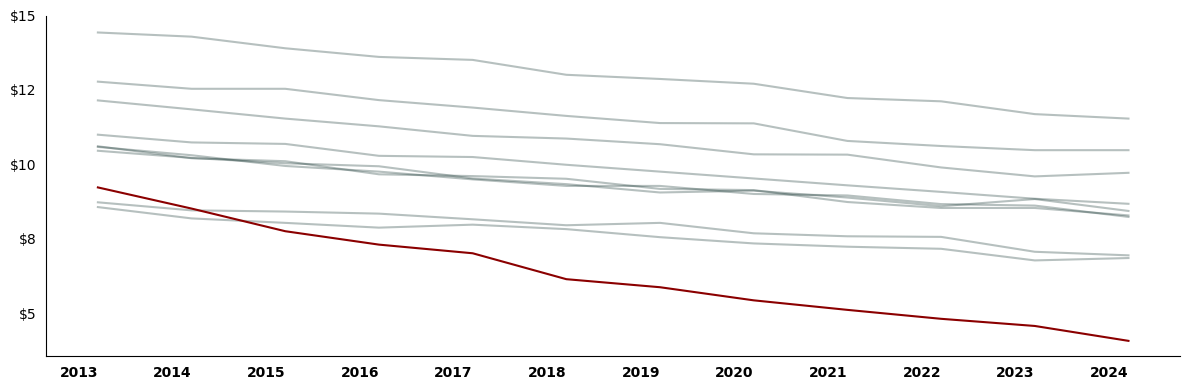

In [9]:
def crear_grafica_tendencia(df, output_path="bar_chart_custom_theme.svg"):
    plt.rcParams['svg.fonttype'] = 'none'
    font_dirs = [Path("../0_fonts")]
    font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
    for font_file in font_files:
        font_manager.fontManager.addfont(font_file)

    fig, ax = plt.subplots(figsize=(12, 4))

    for name, group in df.groupby('entity_name'):
        alpha = 1 if name == "México" else 0.3
        color = "#8B0000" if name == "México" else "#10302C"
        ax.plot(group['data_year'], group['data_value'], label=name if name == "México" else "",
                alpha=alpha, color=color, linewidth=1.5)

    ax.set_xticks(years)
    ax.set_xticklabels(years, rotation=0, ha='right', fontweight='bold')
    ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"${x:,.0f}"))
    ax.set_yticks(np.linspace(5, 15, num=5))
    ax.tick_params(axis='x', which='both', bottom=False, top=False)
    ax.tick_params(axis='y', which='both', left=False, right=False)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.tight_layout()
    plt.savefig(output_path, dpi=300, transparent=True)
    plt.show()


# Llamar la función
crear_grafica_tendencia(df)